<div style="text-align: right"> 13.12.2019</div>

***Name:*** 

# Hausaufgabe Blatt 8

## Rollen: Schiefe Ebene 

Wir betrachten einen Zylinder mit Radius $R$, Masse $m$ und Kreismittelpunkt $M$. Wir wollen die Bewegung des Zylinders entlang einer schiefen Ebene berechnen und visualisieren. Die schiefe Ebene hat einen Neigungswinkel $\theta = 12^{\circ}$. Der Startpunkt des Zylinders befinde sich $h_0=1$ über dem Boden.


<img src="./rollingPlane.png" alt="rollingPlane" width="300"/>

Die Höhe $h$ nach der auf der Ebene zurückgelegten Strecke $l$ beträgt
$$
h = h_0 - l \sin \theta
$$

und somit gilt für die potentielle Energie:
$$
E_{\mathrm{pot}} = m g (h_0 - l \sin \theta).
$$

Die kinetische Energie setzt sich zusammen aus der Translationsenergie $E_\mathrm{trans}=\frac{1}{2}mv^2 = \frac{1}{2}m\omega^2 R^2$ und der Rotationsenergie um die Hauptrotationsachse $E_\mathrm{rot}=\frac{1}{2}I\omega^2$, wobei $I$ das Trägheitsmoment des Zylinders bezüglich seiner Hauptrotationsachse ist
$$
E_\mathrm{kin}= E_\mathrm{trans} + E_\mathrm{rot} = \frac{1}{2}\left(I+mR^2\right)\omega^2.
$$

Die potentielle Energie wird beim Rollen in kinetische Energie umgesetzt. Es gilt also nach zurückgelegter Strecke $l$
$$
 m g l \sin \theta = \frac{1}{2}\left(I+mR^2\right)\omega^2.
 $$
 
**a)** Nehmen Sie an, es handle sich um einen Vollzylinder mit der Masse $m=1$ und einem Radius $R=0.1$.
Plotten Sie die Geschwindigkeit $v$ des Mittelpunktes $M$ in Abhängigkeit von der zurückgelegten Strecke $l$.

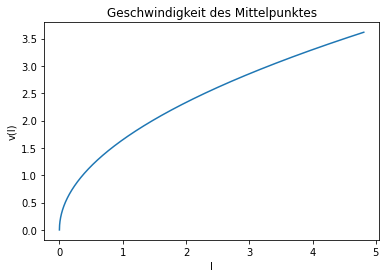

4.809734344744132


In [32]:
import numpy as np
import matplotlib.pyplot as plt
g=9.81
t=(np.pi/15)
th=np.sin(t)
m=1
h0=1
R=0.1
v=[]
lw=h0/th
N=10000
I=0.5*m*R**2
l = np.linspace(0, lw, N)

for i in range (0,N):
    w=((2*R**2*m*g*l[i]*th)/(I+m*R**2))**(1/2)
    v.append(w)
                   
fig, ax = plt.subplots()

ax.set_title("Geschwindigkeit des Mittelpunktes")  # Titel
ax.set_xlabel("l") # x-Achsenbeschriftrung
ax.set_ylabel("v(l)") # y-Achsenbeschriftung

plt.plot(l, v)  
#plt.legend(loc='lower left')
plt.show()

**b)** Plotten Sie die $y$-Komponente des Punktes $A$ gegen die Zeit $t$ im mit dem Mittelpunkt M translatierenden Koordinatensystem. Plotten Sie ebenfalls die Bahnkurve (also $x(t)$ gegen $y(t)$) des Mittelpunkts $M$ und die Bahnkurve des Punktes $A$ im ruhenden Bezugssystem. Hinweis: Die Situation hier ähnelt Übungsblattaufgabe Nr. 2.5.

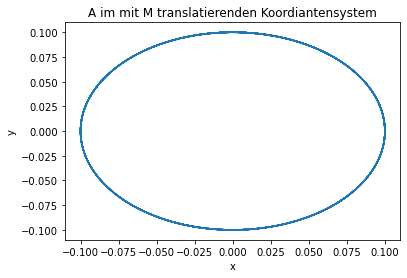

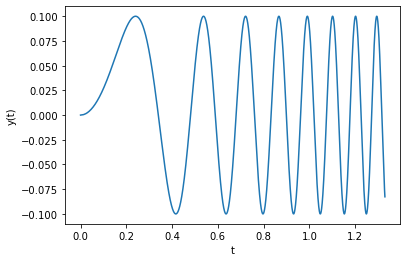

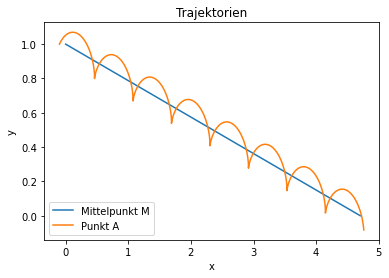

0.6283185307179586


In [31]:
# Hilfe zur Berechnung von t:
t = np.zeros_like(v) # hier ist v die vorher berechnete Geschwindigkeit v
t[1:] = l[1:] / v[1:] # Berechnung der Zeit; l ist die zurückgelegte Distanz wie in der Aufgabenstellung beschrieben
# Diese Art auf arrays zuzugreifen nennt man *slicing*.
U=2*np.pi*R
ym=[]         #Koordianten M
xm=[]
xat=[]      #t,y Koordianten A im bewegten Bezugssystem
yat=[]        
xar=[]         #Koordinaten A im ruhenden Bezugssystem
yar=[]
# Berechne die Koordinaten x und y von M in Abhängigkeit von l und theta
for i in range(0,N):
    n=h0-l[i]*th                        #y-Koordinate
    ym.append(n)
    k=((l[i])**2-(h0-n)**2)**(1/2)      #x-Koordiante
    xm.append(k)
# Berechne die Koordinaten des Punkts A im mit dem Mittelpunkt M translatierenden Koordinatensystem abhängig von
#R, omega und t: y gegen x
for i in range(0,N):
    b=R*-np.cos(v[i]*t[i]/R)         #x-Koordinate,(-cos, damit es sich in mathematisch negative Richtung dreht?!)
    xat.append(b)
    c=R*np.sin(v[i]*t[i]/R)       #y-Koordinate
    yat.append(c)
# Berechne aus den Koordinaten x und y und aus den Koordianten des Punkts A im mit dem Mittelpunkt M translatierenden Koordinatensystem
# die Koordinaten des Punkts A im ruhenden Bezugssystem (Tipp: Addition)
for i in range (0,N):
    a=xm[i]+xat[i]
    xar.append(a)
    b=ym[i]+yat[i]
    yar.append(b)

# Plotte y-Koordinate des Punkts A im mit dem Punkt M tanslatierenden Koordinatensystem 
fig, ax = plt.subplots()

ax.set_title("A im mit M translatierenden Koordiantensystem")  # Titel
ax.set_xlabel("x") # x-Achsenbeschriftrung
ax.set_ylabel("y") # y-Achsenbeschriftung

plt.plot(xat, yat)
plt.show()
# Plotte Trajektorie von Mittelpunkt M und Punkt A
fig, ax = plt.subplots()

plt.plot(t, yat)
ax.set_xlabel("t") # x-Achsenbeschriftrung
ax.set_ylabel("y(t)") # y-Achsenbeschriftung
plt.show()

fig, ax=plt.subplots()
ax.set_title("Trajektorien")  # Titel
ax.set_xlabel("x") # x-Achsenbeschriftrung
ax.set_ylabel("y") # y-Achsenbeschriftung
plt.plot(xm, ym, label='Mittelpunkt M')
plt.plot(xar, yar, label='Punkt A')
plt.legend(loc='lower left')
plt.show()